In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Data

df = pd.read_csv('ratings_Beauty.csv')

print("Shape: ", df.shape)
print("Columns: ", df.columns)

df.head()

('Shape: ', (2023070, 4))
('Columns: ', Index([u'UserId', u'ProductId', u'Rating', u'Timestamp'], dtype='object'))


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
print("Unique UserId count: ", df.UserId.nunique())
print("Unique ProductId count: ", df.ProductId.nunique())

('Unique UserId count: ', 1210271)
('Unique ProductId count: ', 249274)


/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


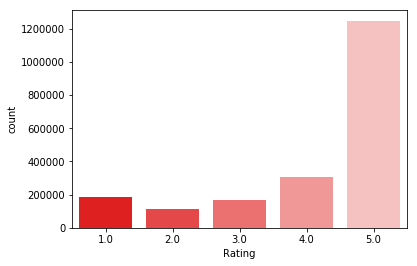

In [4]:
sns.countplot(x='Rating', data=df, palette=sns.light_palette('red', reverse=True))

In [5]:
product_rating = df.groupby('ProductId')['Rating'].mean()
product_rating.head()

ProductId
0205616461    5.0
0558925278    4.0
0733001998    4.0
0737104473    1.0
0762451459    5.0
Name: Rating, dtype: float64

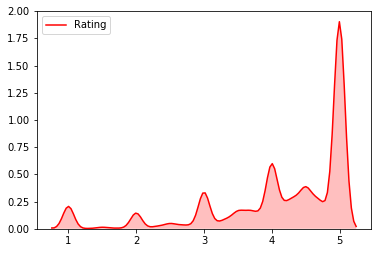

In [6]:
sns.kdeplot(product_rating, shade=True, color='red')

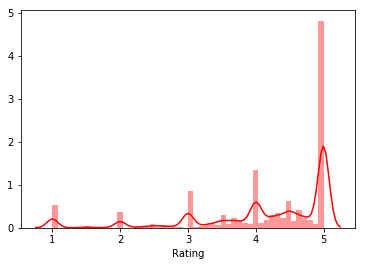

In [7]:
sns.distplot(product_rating, color='red')

In [8]:
product_rating_count = df.groupby('ProductId')['Rating'].count()
product_rating_count.head()

ProductId
0205616461    1
0558925278    2
0733001998    1
0737104473    1
0762451459    1
Name: Rating, dtype: int64

In [9]:
unique_products = df.ProductId.unique()
product_details = pd.DataFrame({'Mean_rating': product_rating[unique_products],\
                                'Count': product_rating_count[unique_products]})
product_details.head()

,Count,Mean_rating
ProductId,,
0205616461,1,5.0
0558925278,2,4.0
0733001998,1,4.0
0737104473,1,1.0
0762451459,1,5.0


In [10]:
print(product_details['Count'].max())

7533


/usr/lib/python2.7/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


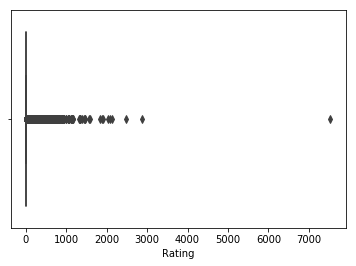

In [11]:
sns.boxplot(product_rating_count)

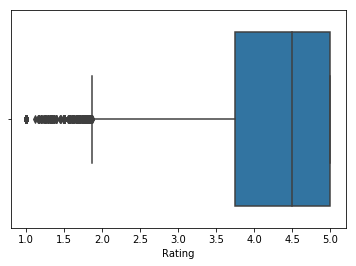

In [12]:
sns.boxplot(product_rating)

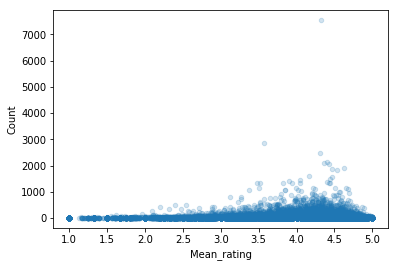

In [13]:
product_details.plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.2)

In [14]:
print("Mean rating: ", product_details['Mean_rating'].mean())
print("Median rating: ", np.median(product_details['Mean_rating']))

('Mean rating: ', 4.149251141223176)
('Median rating: ', 4.5)


In [15]:
print("Weighted mean rating: ", (product_rating*product_rating_count).sum()/product_rating_count.sum())

('Weighted mean rating: ', 4.149035871225415)


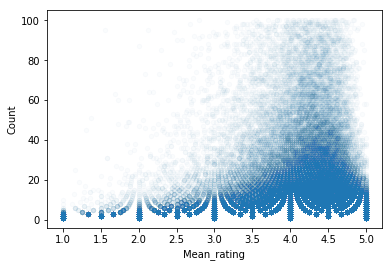

In [16]:
# Less than 100 ratings
product_details[product_details['Count']<101].plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.02)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


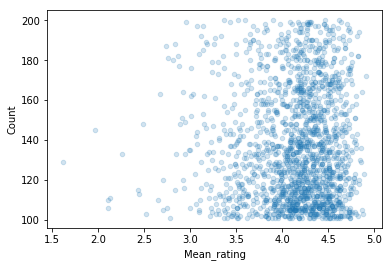

In [17]:
# 100 to 200 ratings
product_details[product_details['Count']>100]\
[product_details['Count']<201].plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.20)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


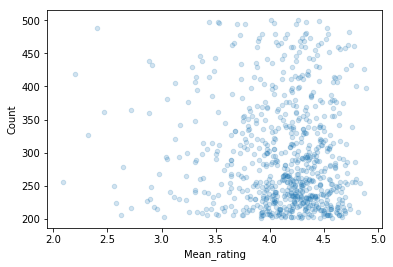

In [18]:
# 200 to 500 ratings
product_details[product_details['Count']>200]\
[product_details['Count']<501].plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.20)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


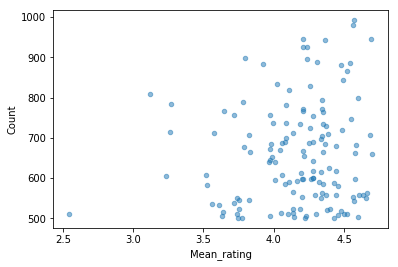

In [19]:
# 500 to 1000 ratings
product_details[product_details['Count']>500]\
[product_details['Count']<1001].plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.50)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


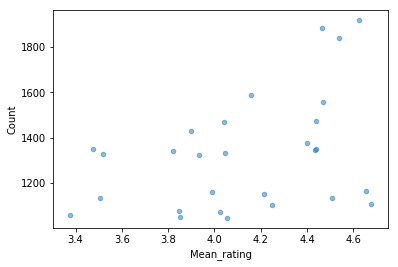

In [20]:
# 1000 to 2000 ratings
product_details[product_details['Count']>1000]\
[product_details['Count']<2001].plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.50)

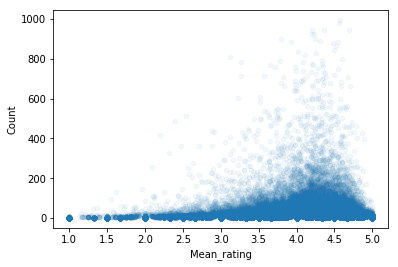

In [21]:
# 0 to 1000 ratings
product_details[product_details['Count']<1001].plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.05)

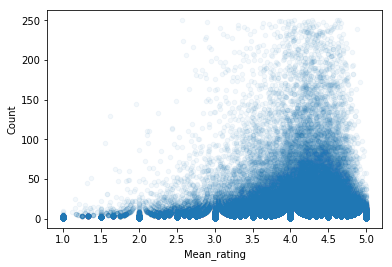

In [22]:
# 0 to 250 ratings
product_details[product_details['Count']<251].plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.05)

In [23]:
value = product_details[product_details['Count']<10]
print(value.shape)

(212336, 2)


In [24]:
# Product categories - Beauty has 7 major categories

pid = df.ProductId.copy()
pid.head()

0    0205616461
1    0558925278
2    0558925278
3    0733001998
4    0737104473
Name: ProductId, dtype: object

In [25]:
type(pid[0])

str

In [26]:
pid_cat1 = np.array([each[:1] for each in pid])
print(pid_cat1[:10])

['0' '0' '0' '0' '0' '0' '1' '1' '1' '1']


In [27]:
print("Cat1 eval: ", len(np.unique(pid_cat1)))
print("Cat1 eval: ", np.unique(pid_cat1))

('Cat1 eval: ', 10)
('Cat1 eval: ', array(['0', '1', '3', '4', '5', '6', '7', '8', '9', 'B'], dtype='|S1'))


In [28]:
print(df.ProductId.unique())

['0205616461' '0558925278' '0733001998' ... 'B00LP2YB8E' 'B00LPVG6V0'
 'B00LU0LTOU']


In [29]:
print(product_details.columns)

Index([u'Count', u'Mean_rating'], dtype='object')


In [30]:
product_details['Cat1'] = np.array([each[:1] for each in product_details.index])
product_details.head()

,Count,Mean_rating,Cat1
ProductId,,,
0205616461,1,5.0,0
0558925278,2,4.0,0
0733001998,1,4.0,0
0737104473,1,1.0,0
0762451459,1,5.0,0


In [31]:
cat1 = product_details.groupby(by='Cat1')
cat1['Count'].sum()

Cat1
0          6
1        124
3         38
4         13
5         62
6         71
7         77
8         40
9       1819
B    2020820
Name: Count, dtype: int64

In [32]:
cat1['Mean_rating'].mean()

Cat1
0    3.800000
1    4.061202
3    3.556190
4    3.812500
5    4.656407
6    3.763454
7    3.656079
8    3.702083
9    4.256487
B    4.149144
Name: Mean_rating, dtype: float64

In [33]:
X = product_details[['Count', 'Mean_rating']].values
print(X)

[[1. 5.]
 [2. 4.]
 [1. 4.]
 ...
 [1. 5.]
 [1. 5.]
 [1. 5.]]


In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(X)

In [35]:
val = kmeans.predict(X)
print(val)
print(np.unique(val))

[0 0 0 ... 0 0 0]
[0 1 2 3 4]


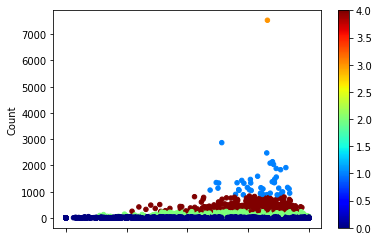

In [36]:
product_details.plot(kind='scatter', x='Mean_rating', y='Count', c=val, cmap='jet')

In [37]:
print("Count mean: ", product_rating_count.mean())
print("Count median: ", np.median(product_rating_count))

('Count mean: ', 8.115848423822781)
('Count median: ', 2.0)


In [38]:
print("Product with more than 3000 ratings: ", product_details[product_details.Count>3000])

('Product with more than 3000 ratings: ',             Count  Mean_rating Cat1
ProductId                          
B001MA0QY2   7533     4.321386    B)


In [39]:
print("Total number of products: ", product_details.shape[0])
print("Number of products with less than 100 ratings: ",len(product_details[product_details.Count<100]))

('Total number of products: ', 249274)
('Number of products with less than 100 ratings: ', 246555)


In [40]:
print("Number of products with less than 10 ratings: ",len(product_details[product_details.Count<10]))

('Number of products with less than 10 ratings: ', 212336)


In [41]:
test_data = product_details[product_details['Count']>100][product_details['Count']<201].copy()
test_data.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Count,Mean_rating,Cat1
ProductId,,,
B00004TMFE,137,3.445255,B
B00004TUBV,171,4.269006,B
B00004U9UY,146,4.726027,B
B000052WYD,143,3.874126,B
B000052WYN,110,3.809091,B


In [42]:
test_data['Count'].describe()

count    1759.000000
mean      137.245594
std        27.718435
min       101.000000
25%       113.000000
50%       132.000000
75%       158.000000
max       200.000000
Name: Count, dtype: float64

In [43]:
X_train = test_data[['Mean_rating', 'Count']].values
print(X_train)
Y_train = test_data.index.values
print(Y_train)

[[  3.44525547 137.        ]
 [  4.26900585 171.        ]
 [  4.7260274  146.        ]
 ...
 [  4.75796178 157.        ]
 [  4.80246914 162.        ]
 [  4.68613139 137.        ]]
['B00004TMFE' 'B00004TUBV' 'B00004U9UY' ... 'B00KHGIK54' 'B00KHH2VOY'
 'B00KQBR9FM']


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [45]:
neigh = knn.kneighbors(X=[[4.7260274, 146.]], n_neighbors=100, return_distance=False)
print(neigh)

[[   2  301  411 1275  651  420 1627  535  917  965 1338 1130  684  653
  1491  673 1043  786  203 1572 1127  507  320  426  284 1648  825 1263
   496  210 1706   73  910   77  793  262  281 1652 1400  686  828  760
  1237 1556 1417  971  446 1477  614   75 1077   26  663  843  303 1155
   287 1392  773  206  988 1282 1325  176 1032  970  444  328  238  650
  1293 1103 1316  195 1354  110 1084 1674  939 1177  246 1143 1753   80
   983 1336  139  662 1616 1584  105 1437 1473  177  242  536  517 1615
   883  602]]


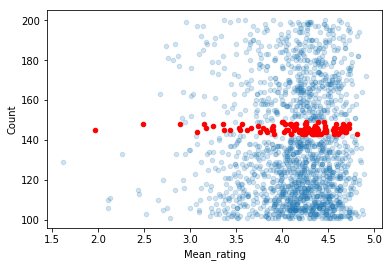

In [46]:
ax = test_data.plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.20)
test_data.iloc[neigh[0]].plot(kind='scatter', x='Mean_rating', y='Count', color='r', ax=ax)

In [47]:
# Normalize that data
# newvalue= (max'-min')/(max-min)*(value-max)+max'
mn = test_data.Count.min()
mx = test_data.Count.max()
print("Min and Max: ", mn, mx)

('Min and Max: ', 101, 200)


In [48]:
test_data['NCount'] = (5.0 - 1.5)/99 * (test_data.Count - mx)+5.0
print(test_data.NCount.describe())

count    1759.000000
mean        2.781410
std         0.979945
min         1.500000
25%         1.924242
50%         2.595960
75%         3.515152
max         5.000000
Name: NCount, dtype: float64


In [49]:
X_train_norm = test_data[['Mean_rating', 'NCount']].values
print(X_train_norm)

[[3.44525547 2.77272727]
 [4.26900585 3.97474747]
 [4.7260274  3.09090909]
 ...
 [4.75796178 3.47979798]
 [4.80246914 3.65656566]
 [4.68613139 2.77272727]]


In [50]:
Norm_knn = KNeighborsClassifier().fit(X_train_norm, Y_train)
neigh = Norm_knn.kneighbors(X=[[4.75796178, 3.47979798]], n_neighbors=100, return_distance=False)

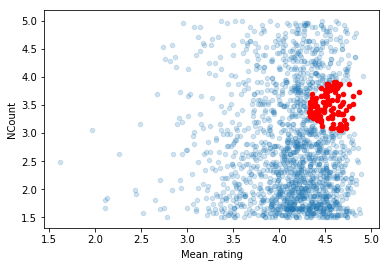

In [51]:
ax = test_data.plot(kind='scatter', x='Mean_rating', y='NCount', alpha=0.20)
test_data.iloc[neigh[0]].plot(kind='scatter', x='Mean_rating', y='NCount', color='r', ax=ax)

In [52]:
reliability = df.groupby('ProductId')['Rating'].std(ddof = -1)
reliability.head()

ProductId
0205616461    0.000000
0558925278    0.816497
0733001998    0.000000
0737104473    0.000000
0762451459    0.000000
Name: Rating, dtype: float64

In [53]:
product_details['Reliability'] = reliability[unique_products]
product_details.head()

,Count,Mean_rating,Cat1,Reliability
ProductId,,,,
0205616461,1,5.0,0,0.000000
0558925278,2,4.0,0,0.816497
0733001998,1,4.0,0,0.000000
0737104473,1,1.0,0,0.000000
0762451459,1,5.0,0,0.000000


In [54]:
product_details.Reliability.describe()

count    249274.000000
mean          0.459072
std           0.582903
min           0.000000
25%           0.000000
50%           0.000000
75%           0.978337
max           1.925233
Name: Reliability, dtype: float64

In [55]:
print(product_details[product_details.Reliability == product_details.Reliability.max()])

            Count  Mean_rating Cat1  Reliability
ProductId                                       
B001E96M4Y     23     3.043478    B     1.925233


In [56]:
print(df[df.ProductId == 'B001E96M4Y'].Rating)

663070    5.0
663071    1.0
663072    5.0
663073    1.0
663074    1.0
663075    5.0
663076    1.0
663077    1.0
663078    1.0
663079    5.0
663080    5.0
663081    1.0
663082    5.0
663083    5.0
663084    5.0
663085    4.0
663086    5.0
663087    5.0
663088    1.0
663089    1.0
663090    5.0
663091    1.0
663092    1.0
Name: Rating, dtype: float64


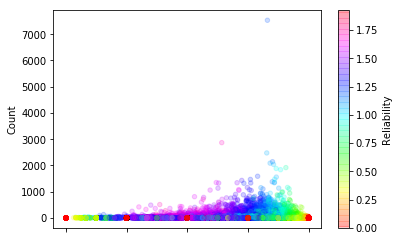

In [57]:
product_details.plot(kind='scatter', x='Mean_rating', y='Count', c='Reliability', cmap='hsv', alpha=0.20)

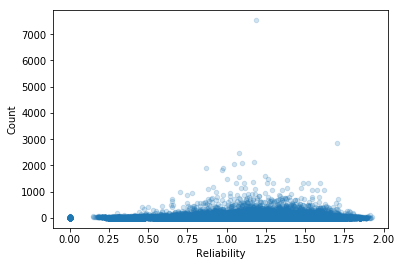

In [58]:
product_details.plot(kind='scatter', x='Reliability', y='Count', alpha=0.20)

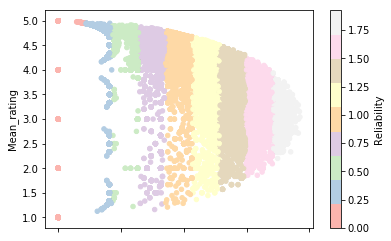

In [59]:
product_details.plot(kind='scatter', x='Reliability', y='Mean_rating', c='Reliability', cmap='Pastel1')

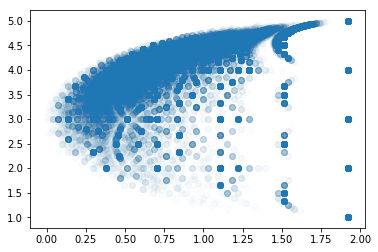

In [60]:
mx = product_details.Reliability.max()
n_rel = mx - product_details['Reliability']
plt.scatter(n_rel, product_details.Mean_rating, alpha=0.02)

In [61]:
ar1 = np.array([1, 5.])
ar2 = np.array([1, 3, 5.])
print(ar1.std(ddof = -1), ar2.std(ddof = -1))
print(ar1.std(), ar2.std())

(1.632993161855452, 1.4142135623730951)
(2.0, 1.632993161855452)


In [62]:
ar3 = np.array([3.])
print(ar3.std())

0.0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


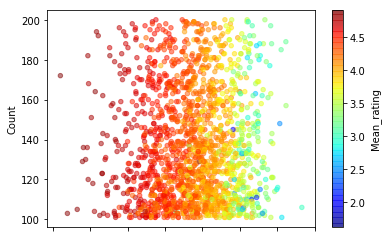

In [63]:
product_details[product_details['Count']>100][product_details['Count']<201].\
    plot(kind='scatter', x='Reliability', y='Count', c='Mean_rating', cmap='jet', alpha=0.50)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


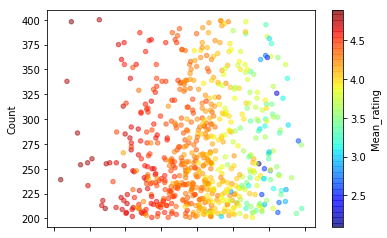

In [64]:
product_details[product_details['Count']>200][product_details['Count']<401].\
    plot(kind='scatter', x='Reliability', y='Count', c='Mean_rating', cmap='jet', alpha=0.50)

Low Reliability items have a Lower Mean_rating (For items having count in the range (100, 400)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


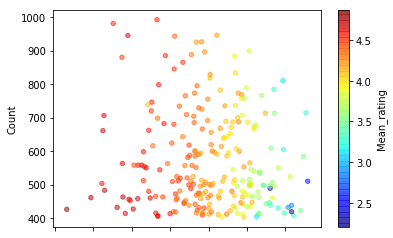

In [65]:
product_details[product_details['Count']>400][product_details['Count']<1000].\
    plot(kind='scatter', x='Reliability', y='Count', c='Mean_rating', cmap='jet', alpha=0.50)

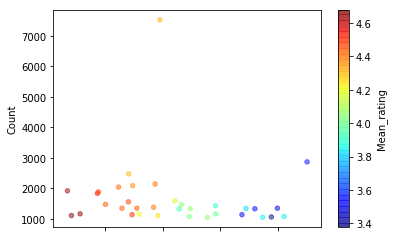

In [66]:
product_details[product_details['Count']>1000].\
    plot(kind='scatter', x='Reliability', y='Count', c='Mean_rating', cmap='jet', alpha=0.50)

Same observation all counts > 100

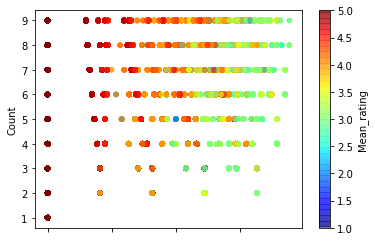

In [67]:
product_details[product_details['Count']<10].\
    plot(kind='scatter', x='Reliability', y='Count', c='Mean_rating', cmap='jet', alpha=0.50)

In [68]:
print("Mean reliability rating: ", product_details.Reliability.mean())

('Mean reliability rating: ', 0.45907200422110533)


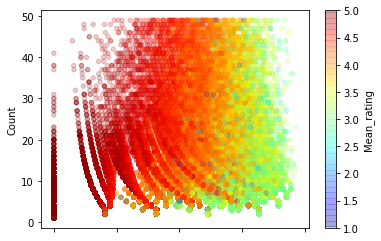

In [69]:
product_details[product_details['Count']<50].\
    plot(kind='scatter', x='Reliability', y='Count', c='Mean_rating', cmap='jet', alpha=0.20)

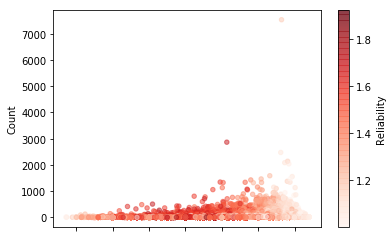

In [70]:
product_details[product_details.Reliability > 1]\
    .plot(kind='scatter', x='Mean_rating', y='Count', c='Reliability', cmap='Reds', alpha=0.50)

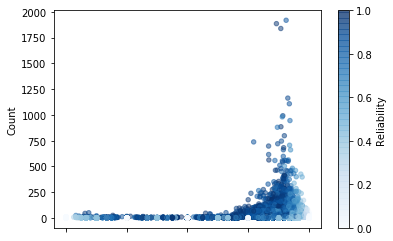

In [71]:
product_details[product_details.Reliability < 1]\
    .plot(kind='scatter', x='Mean_rating', y='Count', c='Reliability', cmap='Blues', alpha=0.50)

In [75]:
cor = np.corrcoef(x=product_details.Reliability, y=product_details.Mean_rating)
print("Coefficient of correlation: ")
print(cor)

Coefficient of correlation: 
[[ 1.         -0.26862182]
 [-0.26862182  1.        ]]
